In [125]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Images/opencv_logo1.png')
#assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((7,7),np.float32)/25
dst = cv.filter2D(img,-1,kernel)


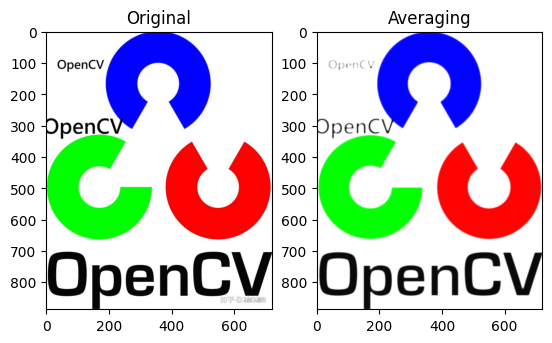

True

In [126]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
#plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
#plt.xticks([]), plt.yticks([])
plt.show()
cv.imwrite('Images/opencv_blurred.png',dst)

### Image Blurring (Image Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). OpenCV provides four main types of blurring techniques.

1. Averaging
2. Gaussian Blurring
3. Median Blurring
4. Bilateral Filtering


#### 1. Averaging
This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:

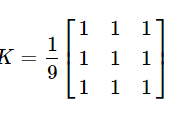

###### Note
If you don't want to use a normalized box filter, use cv.boxFilter(). Pass an argument normalize=False to the function.
Check a sample demo below with a kernel of 5x5 size:


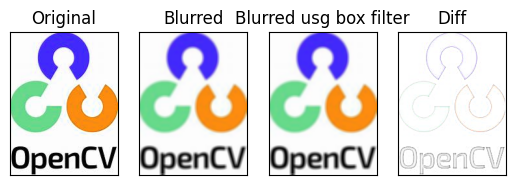

In [127]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('Images/opencv_logo.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.blur(img,(5,5))

dst=cv.boxFilter(img, -1, (5,5), normalize = True)
diff=cv.add(img,-dst)

plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dst),plt.title('Blurred usg box filter')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(diff),plt.title('Diff')
plt.xticks([]), plt.yticks([])

plt.show()

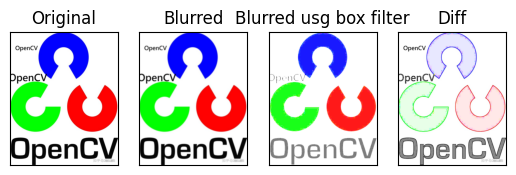

In [128]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('Images/opencv_logo1.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.blur(img,(5,5))

dst=cv.boxFilter(img, -1, (5,5), normalize = False)
diff=cv.add(img,-dst)

plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dst),plt.title('Blurred usg box filter')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(diff),plt.title('Diff')
plt.xticks([]), plt.yticks([])

plt.show()

#### 2. Gaussian Blurring
In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

If you want, you can create a Gaussian kernel with the function, cv.getGaussianKernel().

The above code can be modified for Gaussian blurring:

In [129]:
blur = cv.GaussianBlur(img,(5,5),0)

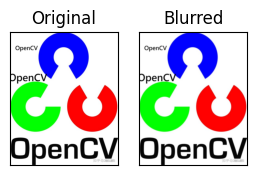

In [130]:
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

(<matplotlib.image.AxesImage at 0x2217a32fed0>, Text(0.5, 1.0, 'Original'))

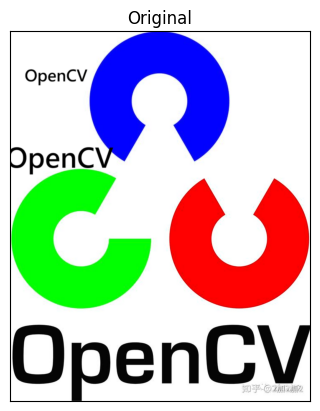

In [131]:
plt.xticks([]), plt.yticks([])
plt.imshow(img),plt.title('Original')


(<matplotlib.image.AxesImage at 0x2217a35e190>, Text(0.5, 1.0, 'Blurred'))

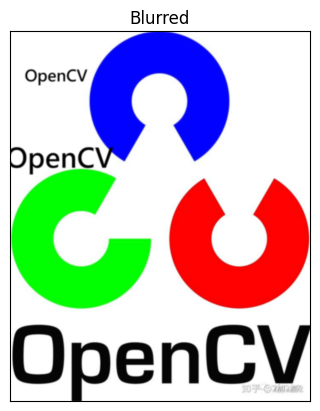

In [132]:
plt.xticks([]), plt.yticks([])
plt.imshow(blur),plt.title('Blurred')


### 3. Median Blurring
Here, the function cv.medianBlur() takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In this demo, I added a 50% noise to our original image and applied median blurring. Check the result:

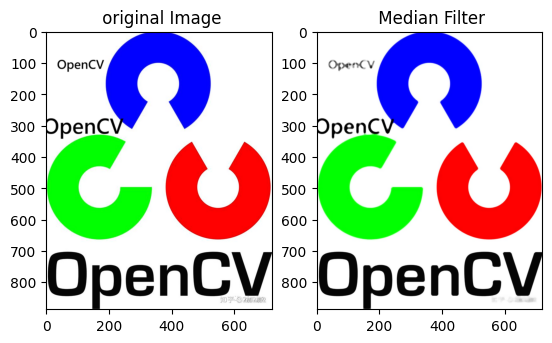

In [133]:
median = cv.medianBlur(img,9)

plt.subplot(121), plt.imshow(img), plt.title(" original Image")
plt.subplot(122), plt.imshow(median), plt.title(" Median Filter")
plt.show()

#### 4. Bilateral Filtering
cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

The below sample shows use of a bilateral filter (For details on arguments, visit docs).

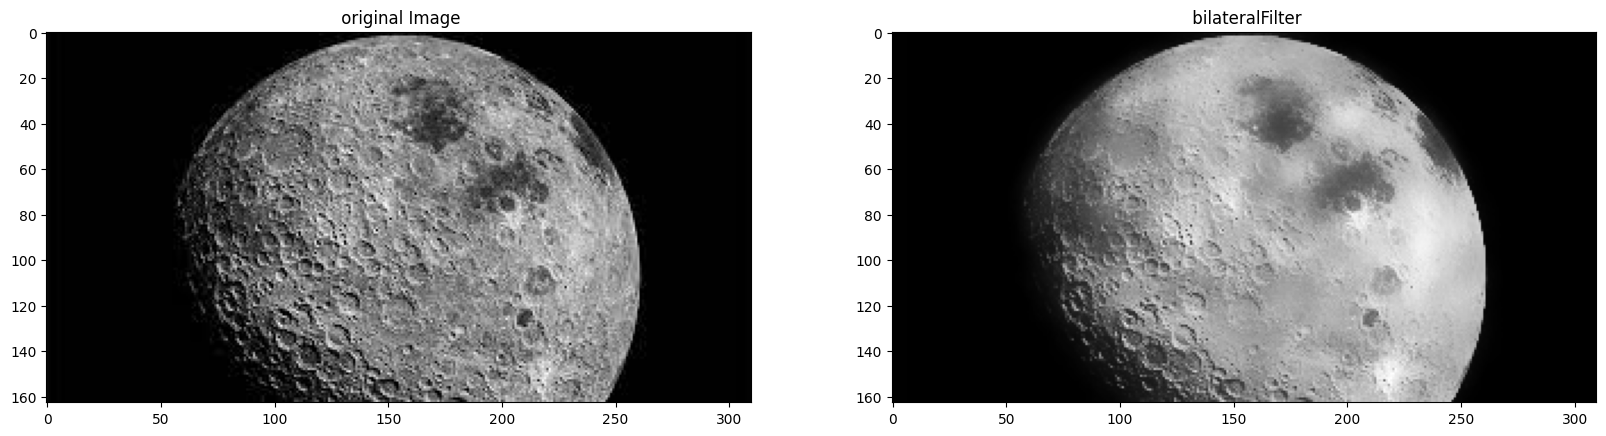

In [134]:
import cv2 as cv
import matplotlib.pyplot as plt
img=cv.imread("Images/moon1.jpeg",0)

blur = cv.bilateralFilter(img,15,50,50)
plt.figure(figsize=(20,5))
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title(" original Image")
plt.subplot(122), plt.imshow(blur, cmap="gray"), plt.title(" bilateralFilter")
plt.show()

(<matplotlib.image.AxesImage at 0x2217a2bce90>,
 Text(0.5, 1.0, ' original Image'))

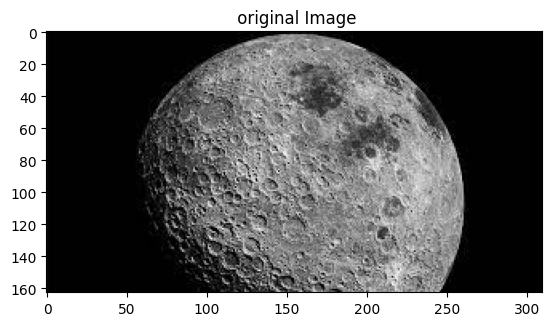

In [135]:
plt.imshow(img, cmap="gray"), plt.title(" original Image")


(<matplotlib.image.AxesImage at 0x2217a2714d0>,
 Text(0.5, 1.0, ' Bilateral Filter'))

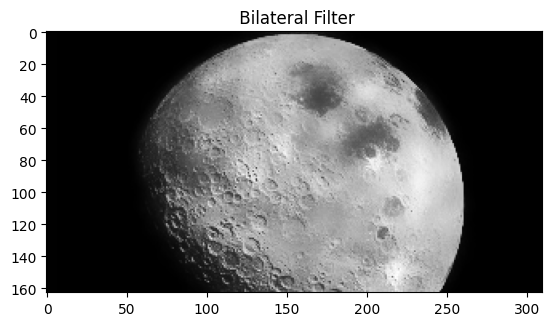

In [136]:
plt.imshow(blur, cmap="gray"), plt.title(" Bilateral Filter")


### Image gradients, edges etc
We will see following functions : cv.Sobel(), cv.Scharr(), cv.Laplacian() etc

#### Theory
OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian.
 We will see each one of them.

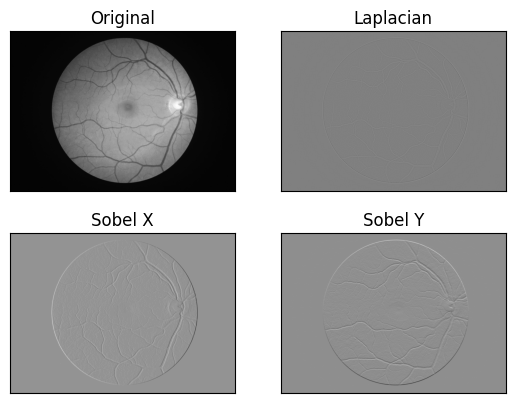

In [152]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Images/dave.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()